<a href="https://colab.research.google.com/github/kunamneni117/Introduction-To-Machine-Learning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import *

In [0]:
def Load_Titanic_Dataset(path):
  return pd.read_csv(path)


In [0]:
Titanic_Data_Path='/content/train.csv'
Titanic_Data =Load_Titanic_Dataset(Titanic_Data_Path)

In [8]:
Titanic_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
Titanic_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
Titanic_Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
Titanic_Data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
Titanic_Data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
Titanic_Data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
Titanic_Data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

In [0]:
from sklearn.pipeline import Pipeline,FeatureUnion

In [19]:
! pip install sklearn_features

In [0]:
from sklearn_features.transformers import DataFrameSelector

In [0]:
from sklearn.base import BaseEstimator,TransformerMixin

In [0]:
class Custom_DataFrameSelector(BaseEstimator,TransformerMixin):
  def __init__(self,attributes):
    self.attributes=attributes
  def fit(self,X,y=None):
    return self
  def transform(self,X,y=None):
    return X[self.attributes]


Testing the Custom Dataframe Selector Using a Dataframe

In [0]:
Titanic_Data.columns
Test_Columns=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex']

In [0]:
Testing = Custom_DataFrameSelector(Test_Columns)

In [27]:
Testing.fit_transform(Titanic_Data).head()

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


Its Worked .......Hurray

In [0]:
try:
  from sklearn.preprocessing import SimpleImputer 
except ImportError:
  from sklearn.preprocessing import Imputer as SimpleImputer

In [29]:
Titanic_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
Titanic_Features_Numericals_Columns = ["Age", "SibSp", "Parch", "Fare"]

In [0]:
Titanic_Data_Features = Titanic_Data.drop('Survived',axis =1)
Titanic_Data_Features= Titanic_Data_Features.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [0]:
Titanic_Data_Labels = Titanic_Data[['Survived']]

In [39]:
list(Titanic_Data_Features)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [45]:
Titanic_Features_Numericals_Columns

['Age', 'SibSp', 'Parch', 'Fare']

In [47]:
Numerical_Pipeline = Pipeline([
                               ('Select_Numerical_Columns',Custom_DataFrameSelector(Titanic_Features_Numericals_Columns)),
                                ('imputer',SimpleImputer(strategy='median')),
                   ])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
Numerical_Pipeline.fit_transform(Titanic_Data_Features)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [51]:
for c in Titanic_Data_Features:
  print(c)

Pclass
Sex
Age
SibSp
Parch
Fare
Embarked


In [54]:
Titanic_Data_Features['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [0]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder 

In [0]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [65]:
cat_pipeline.fit_transform(Titanic_Data).shape

(891, 8)

In [0]:
preprocess_pipeline = FeatureUnion(transformer_list=[('Numerical Pipeline',Numerical_Pipeline),('Categorical Pipeline',cat_pipeline)])

In [68]:
list(Titanic_Data_Features)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [0]:
Titanic_Train_Data = preprocess_pipeline.fit_transform(Titanic_Data_Features)

In [70]:
Titanic_Train_Data.shape

(891, 12)

In [0]:
Y_Train = Titanic_Data['Survived']

In [0]:
from sklearn.svm import SVC

In [0]:
svm_clf = SVC(gamma='auto')

In [74]:
svm_clf.fit(Titanic_Train_Data,Y_Train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
def Load_Titanic_Test_Dataset(path):
  return pd.read_csv(path)

In [0]:
Titanic_Test_Path = '/content/test.csv'
Titanic_Test_Data_Source = Load_Titanic_Test_Dataset(Titanic_Test_Path)

In [0]:
Titanic_Test_Data_Source=Titanic_Test_Data_Source[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [0]:
Titanic_Test_Data_Preprocessed = preprocess_pipeline.fit_transform(Titanic_Test_Data_Source)

In [0]:
Y_Pred = svm_clf.predict(Titanic_Test_Data_Preprocessed)

In [86]:

from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, Titanic_Train_Data, Y_Train, cv=10)
svm_scores.mean()

0.7365250822835092

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
RF_Classifier = RandomForestClassifier(n_estimators=100,random_state=42)

In [90]:
RF_Classifier_scores = cross_val_score(RF_Classifier,Titanic_Train_Data, Y_Train, cv=10)
RF_Classifier_scores.mean()

0.8149526160481217

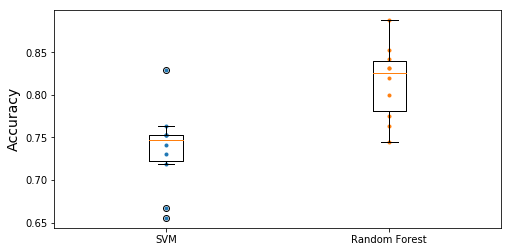

In [91]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, RF_Classifier_scores, ".")
plt.boxplot([svm_scores, RF_Classifier_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()